## Examples of constructing a network by pandas

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
les_nodes = pd.read_csv('les_miserable_node.csv')
les_edges = pd.read_csv('les_miserable_edge.csv')

In [4]:
les_nodes[1:15]

,Id,Label,modularity_class
1,48,Gavroche,8
2,55,Marius,6
3,27,Javert,7
4,25,Thenardier,7
5,23,Fantine,2
6,58,Enjolras,8
7,62,Courfeyrac,8
8,64,Bossuet,8
9,63,Bahorel,8
10,65,Joly,8


In [5]:
les_edges[1:15]

,Source,Target,Weight
1,2,0,8
2,3,0,10
3,3,2,6
4,4,0,1
5,5,0,1
6,6,0,1
7,7,0,1
8,8,0,2
9,9,0,1
10,11,0,5


In [6]:
G = nx.Graph()
for idx,row in les_nodes.iterrows():
    G.add_node(row['Id'],Label=row['Label'],modularity_class=row['modularity_class'])
for idx,row in les_edges.iterrows():
    G.add_edge(row['Source'],row['Target'],Weight=int(row['Weight']))

In [7]:
G.nodes[1]['Label']

'Napoleon'

In [8]:
G.edges[25,27]

{'Weight': 5}

In [9]:
print(nx.info(G))

Graph with 77 nodes and 254 edges


/tmp/ipykernel_69866/2606185536.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


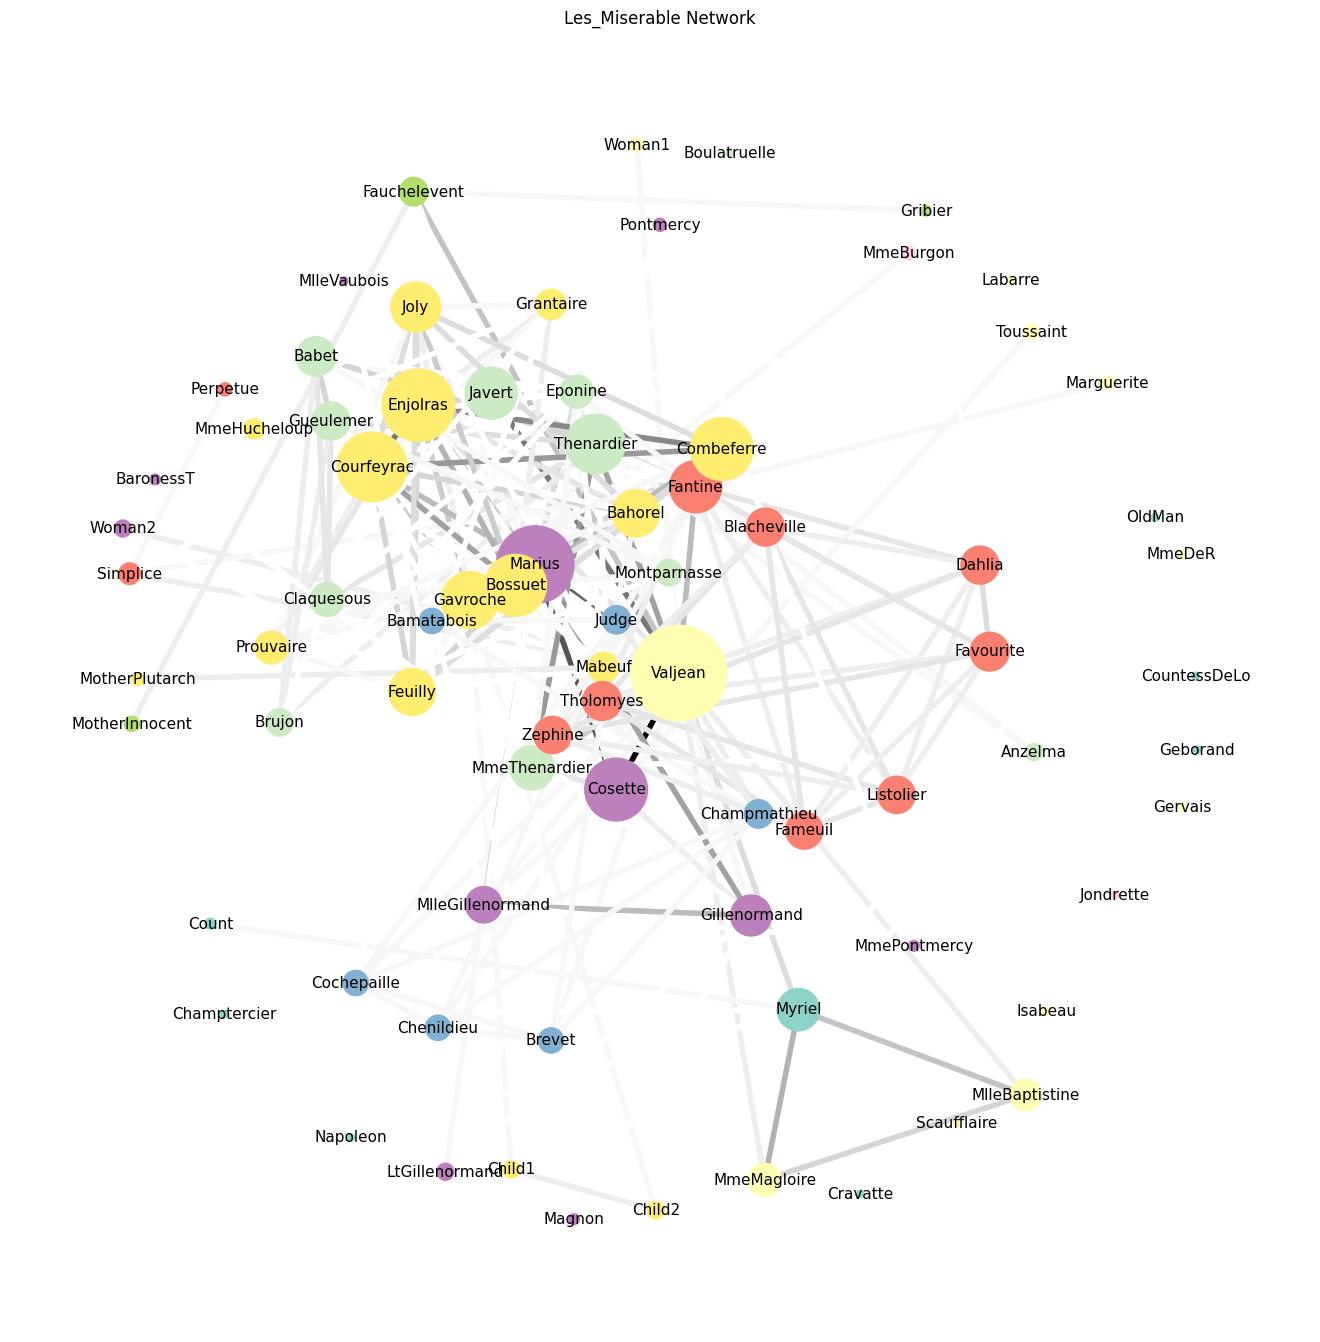

In [10]:
dig = dict(nx.degree(G,weight='Weight')) # degree of network
modul = nx.get_node_attributes(G,'modularity_class')
weight = nx.get_edge_attributes(G,'Weight')

pos=nx.spring_layout(G,iterations=100,k=2) # positions for all nodes
# k = Optimal distance between nodes (default = 1/sqrt(n)), 
# iterations = Number of iterations of spring-force relaxation

plt.figure(figsize=(13,13)) #Control figure size
nx.draw(G,pos
        ,labels=nx.get_node_attributes(G,'Label') # Give label using attributes
        ,node_size = [d*30 for d in dig.values()] # node size
        ,node_color=list(modul.values()) # data for node color
        ,font_size=11 # labelsize
        ,cmap=plt.cm.Set3 # color_map for node
        ,edge_color=list(weight.values()) # data for edge color
        ,width=4 # edge width
        ,edge_cmap=plt.cm.gist_yarg # color_map for edge
       )
plt.title('Les_Miserable Network');
plt.savefig('Les_Miserable.png', format="PNG") # Save figure

## Problem 1:

In les_miserable_node.csv, every node has features such as Label(name) and modularity_class.
Let us assume that modularity_class is the chapter in which an actor(Label) appears.

1. Construct a network where two actors appear in the same chapter and draw the network indicating whose degree of a node is described as the node's size.

2. Find measures such as clustering coefficients and pagerank for each node and draw the network indicating whose mesures of a node is described as the node's mesurements.
